Lec 6.1 All Challenge Problems

Using the 1980 monthly SST netcdf file we used last time:

1. Take the annual mean and plot it with the correct lat and lon. Use a different colormap than the default. Add axes labels, a colorbar and title. In the title, include what the plotted variable is and the units.

2. Take seasonal averages: DJF, etc. Plot the four seasons in a 2x2 plot of subplots, label each plot and put on one colorbar for all the plots, ends extended, with a min value of 0 and a max of 30. Make a descriptive supertitle (suptitle) for all the plots. Would it be correct to label these plots Winter, etc?

3. Mask out regions outside of the tropics (google definition of tropics) and plot the annual mean again. Adjust the font size of your axes labels and title. Adjust the axis limits to be constrained to the data (i.e. no whitespace).

4. Mask out the tropics and plot again.

5. (Advanced) Find the grid cell closest to us. How big is this cell in square km and miles? Plot the seasonal cycle of SST. What are our local seasonal averages, according to this model? Annual Mean? Are they realistic? What data sources could you use to validate this?


In [1]:
#create a plot
#put the annual mean of SST in it
#Put lat/lon on it

# To create a plot the first step is to import matplotlib and numpy.
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


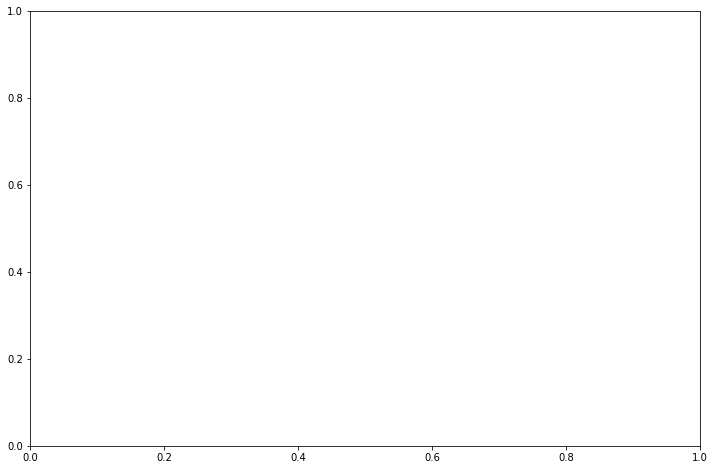

In [7]:
# Make an empty plot

# Create a figure of size 12x8 inchesNo data in it
plt.figure(figsize=(12, 8))

# Show result on screen
plt.subplot()

# Riley: 
#    "I prefer the subplots command which returns both figure and axes objects"


In [11]:
#Now that I have the plot, I need to add the data: 
#1980 monthly SST netcdf file we used last time:
#Take the annual mean and plot it with the correct lat and lon.

# Assign data to a variable: 
Sincdata = np.loadtxt('C:\\Users\\srv_veralab\\Desktop\\CESM.003.SST.1980.nc')
#The problem with this was that the variable name is wrong
#you need to use xr. to open it not np.
#after the dot it should say open data set not load text
# it should also say.nc not .text at the end...

UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 329: character maps to <undefined>

In [13]:
#Trying again since data was not assigned to variable
import xarray as xr
data = xr.open_dataset('C:\\Users\\srv_veralab\\Downloads\\CESM.003.SST.1980.nc')
print(data)
lat = np.array(data.lat)
lon = np.array(data.lon)
data = np.array(data.SST)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 12)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1980-01-31 1980-02-29 ... 1980-12-31
Data variables:
    SST      (time, lat, lon) float32 ...


In [59]:
lat.shape

(180,)

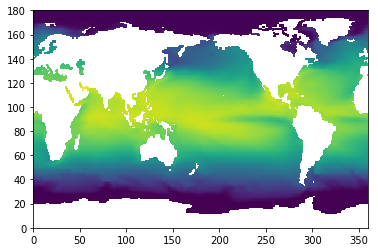

In [14]:
#This is the plot for average SST in June
plt.pcolormesh(data[6,:,:])

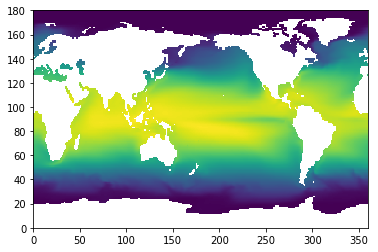

In [18]:
# Now, I want a pcolormap of the anual mean.
meandata = np.mean(data, axis=0)
plt.pcolormesh(meandata)

#This has the data plotted, but the axis is only an index used for the raw dataset. We want Lat/Lon

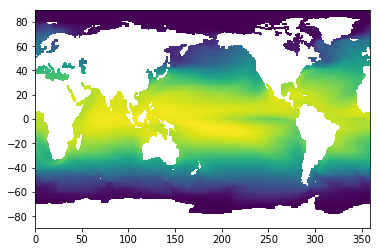

In [22]:
fig, ax = plt.subplots() #This line is code to show the empty plot
ax.pcolormesh(lon, lat, meandata) #This is the code to make a color map with the SST anual mean with a lat/long axis

Text(0.5, 0, 'Longitude')

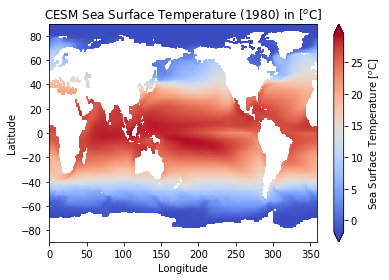

In [28]:
#Use a different colormap than the default. 
#Add axes labels
#Add a colorbar
#Add a title
#In the title, include what the plotted variable is and the units.

fig, ax = plt.subplots() #This line is code to show the empty plot
p = ax.pcolormesh(lon, lat, meandata, cmap="coolwarm",)#cmap= is to change the color of the map

#Adding extend makes little triangles at the ends of the color bar to show that you are not showing the rull range ofthe data
#this is useful when you have outliers
cb = plt.colorbar(p, extend="both")

# Aesthetics
cb.set_label('Sea Surface Temperature [$^{o}$C]')
ax.set_title('CESM Sea Surface Temperature (1980) in [$^{o}$C]')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

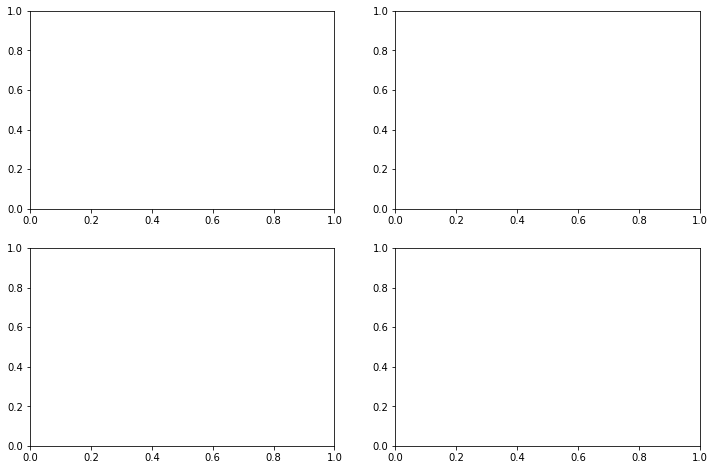

In [29]:
#Take seasonal averages: DJF, etc. 
#Plot the four seasons in a 2x2 plot of subplots
#Label each subplot and put one colorbar for all the plots, ends extended, with a min value of 0 and a max of 30. 
#Make a descriptive supertitle and a subtitle for each of the subplots. 
#Would it be correct to label these plots Winter, etc?

#Make 2x2 plot of subplots
fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)

#Plot the four seasons:

# Winter= [12:3]December, January, February 
# Spring= [3:6]March, April, May
# Summer= [6:9]June, July, August
# Fall= [9:12]September, October, November

# Plot the average of [12:3] in subplot [0,0]
Winter = np.mean(data[12:3,:,:])


In [33]:
#This creates a varable with Jan and Feb
temp= data[(0,1),:,:]
temp.shape

(2, 180, 360)

In [34]:
#This includes December in the variable 
temp2= data[(0,1,11),:,:]
temp2.shape

(3, 180, 360)

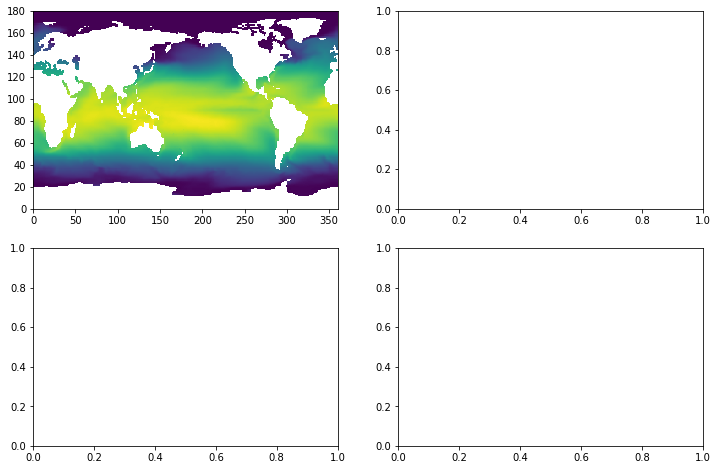

In [37]:
sst_DJF=np.mean(data[(0,1,11),:,:], axis=0)
fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)
ax[0,0].pcolormesh(sst_DJF)

In [38]:
#11:1 doesn't work you would need to list out each month you want to average out
temp2= data[(11:1),:,:]
temp2.shape
sst_DJF=np.mean(data[(0,1,11),:,:], axis=0)
fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)
ax[0,0].pcolormesh(sst_DJF)

SyntaxError: invalid syntax (<ipython-input-38-c209d28f7833>, line 2)

In [42]:
temp3=data[2:5,:,:]

In [43]:
temp3?

In [47]:
temp3.shape

(3, 180, 360)

In [44]:
sst_MAM=np.mean(data[2:5,:,:], axis=0)

In [46]:
sst_MAM.shape

(180, 360)

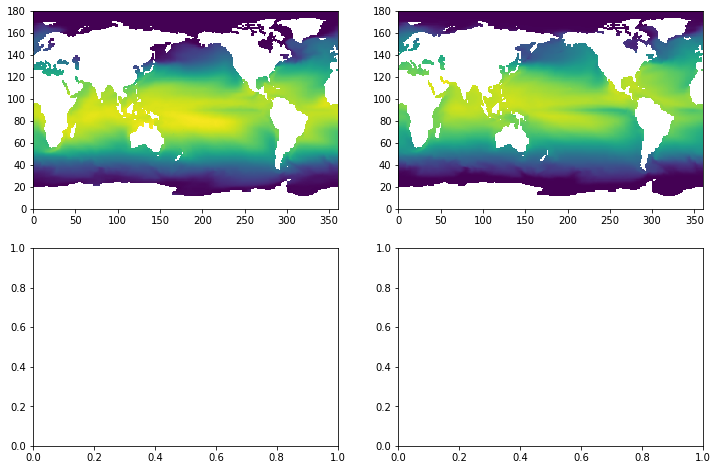

In [57]:
fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)
ax[0,0].pcolormesh(sst_DJF)
ax[0,1].pcolormesh(sst_MAM)

In [54]:
#Find the Average for Summer
sst_JJA=np.mean(data[5:9,:,:], axis=0)
sst_SON=np.mean(data[9:11,:,:], axis=0)


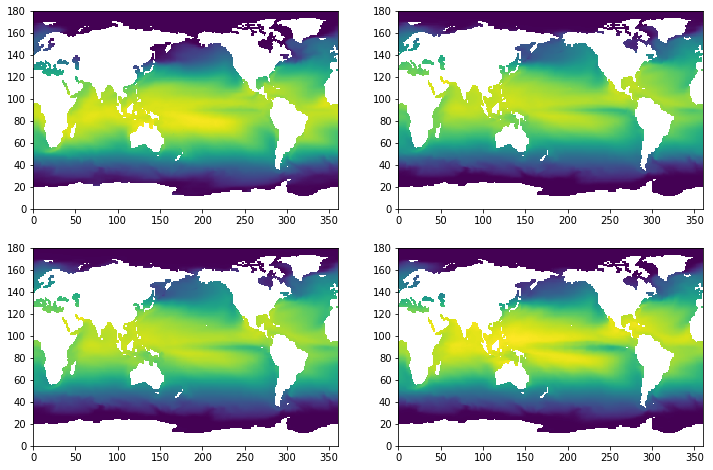

In [58]:
#This should be a plot with all subplots filled in
fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)
ax[0,0].pcolormesh(sst_DJF)
ax[0,1].pcolormesh(sst_MAM)
ax[1,0].pcolormesh(sst_JJA)
ax[1,1].pcolormesh(sst_SON)

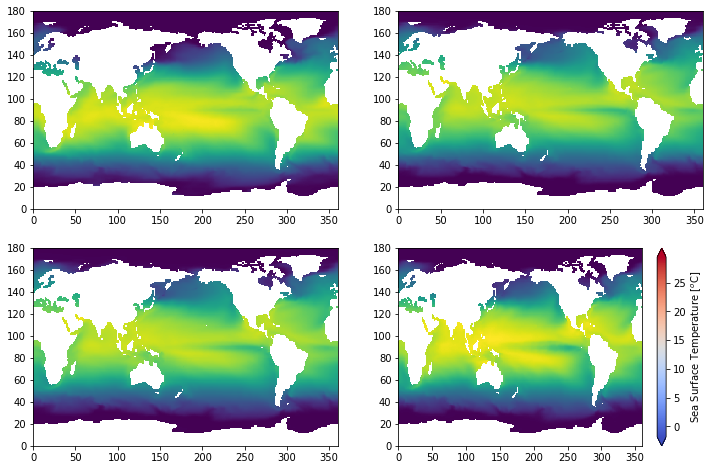

In [61]:
#Label each subplot and put one colorbar for all the plots, ends extended, with a min value of 0 and a max of 30. 
#Make a descriptive supertitle and a subtitle for each of the subplots. 
#Would it be correct to label these plots Winter, etc?

fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)
ax[0,0].pcolormesh(sst_DJF)
ax[0,1].pcolormesh(sst_MAM)
ax[1,0].pcolormesh(sst_JJA)
ax[1,1].pcolormesh(sst_SON)

#Colorbar:
cb = plt.colorbar(p, extend="both")
cb.set_label('Sea Surface Temperature [$^{o}$C]')

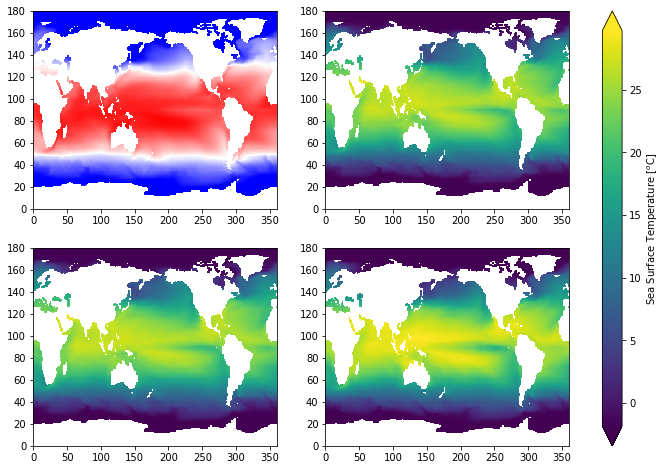

In [67]:
#Label each subplot and 
#put one colorbar for all the plots
#Extended the ends with a min value of 0 and a max of 30


fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)
ax[0,0].pcolormesh(sst_DJF, cmap='bwr',vmin=0, vmax=30)
ax[0,1].pcolormesh(sst_MAM, )
ax[1,0].pcolormesh(sst_JJA)
im = ax[1,1].pcolormesh(sst_SON)

#Colorbar:
cb = fig.colorbar(im, ax = ax, extend = 'both')
#cb = plt.colorbar(p, extend="both")
cb.set_label('Sea Surface Temperature [$^{o}$C]')

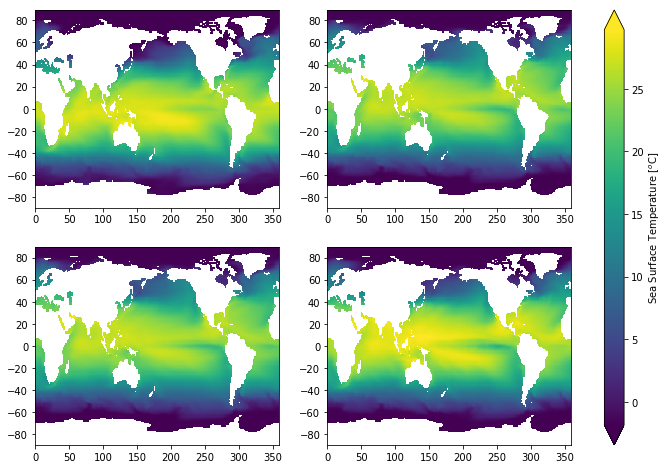

In [74]:
#p = ax.pcolormesh(lon, lat, meandata, cmap="autumn_r",
#                  vmin=-2, vmax=30)

fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2)
ax[0,0].pcolormesh(lon,lat,sst_DJF)
ax[0,1].pcolormesh(lon,lat,sst_MAM)
ax[1,0].pcolormesh(lon,lat,sst_JJA)
im = ax[1,1].pcolormesh(lon,lat,sst_SON)

#Colorbar:
cb = fig.colorbar(im, ax = ax, extend = 'both')
cb.set_label('Sea Surface Temperature [$^{o}$C]')

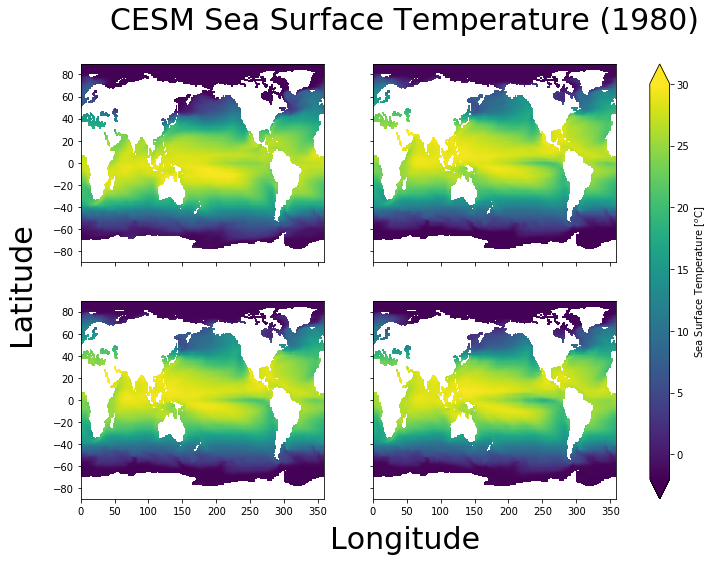

In [89]:
#Now I want to change the min/ max values on the color bar
fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2, sharex=True, sharey=True)
ax[0,0].pcolormesh(lon,lat,sst_DJF,vmin=-2, vmax=30)
ax[0,1].pcolormesh(lon,lat,sst_MAM,vmin=-2, vmax=30)
ax[1,0].pcolormesh(lon,lat,sst_JJA,vmin=-2, vmax=30)
im = ax[1,1].pcolormesh(lon,lat,sst_SON,vmin=-2, vmax=30)

#Titles and Subtitles:
fig.suptitle('CESM Sea Surface Temperature (1980)', fontsize=30)
#ax.set_ylabel('Latitude')
#ax.set_xlabel('Longitude')
fig.text(0.5, 0.04, 'Longitude', ha='center', fontsize=30)
fig.text(0.04, 0.5, 'Latitude', va='center', rotation='vertical', fontsize=30)

#Colorbar:
cb = fig.colorbar(im, ax = ax, extend = 'both')
cb.set_label('Sea Surface Temperature [$^{o}$C]')

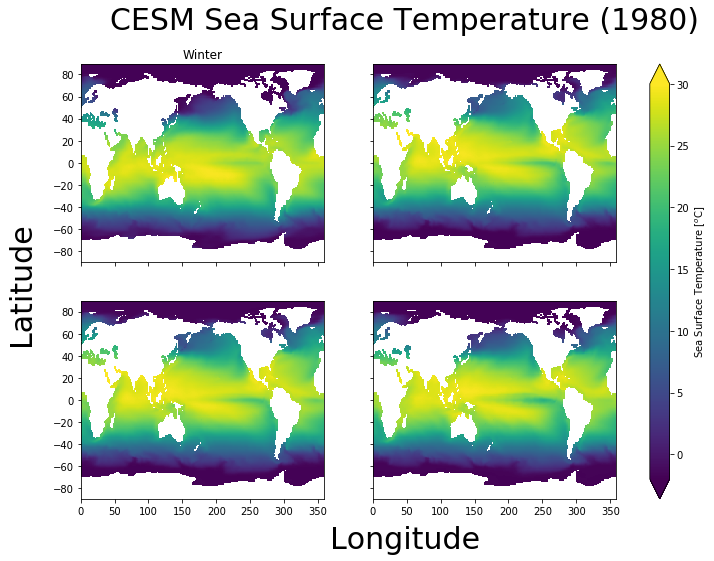

In [90]:
fig, ax = plt.subplots(figsize=(12,8), nrows=2, ncols=2, sharex=True, sharey=True)
ax[0,0].pcolormesh(lon,lat,sst_DJF,vmin=-2, vmax=30)
ax[0,0].set_title('Winter')
ax[0,1].pcolormesh(lon,lat,sst_MAM,vmin=-2, vmax=30)
ax[1,0].pcolormesh(lon,lat,sst_JJA,vmin=-2, vmax=30)
im = ax[1,1].pcolormesh(lon,lat,sst_SON,vmin=-2, vmax=30)

#Titles and Subtitles:
fig.suptitle('CESM Sea Surface Temperature (1980)', fontsize=30)
fig.text(0.5, 0.04, 'Longitude', ha='center', fontsize=30)
fig.text(0.04, 0.5, 'Latitude', va='center', rotation='vertical', fontsize=30)

#Colorbar:
cb = fig.colorbar(im, ax = ax, extend = 'both')
cb.set_label('Sea Surface Temperature [$^{o}$C]')

#3. Mask out regions outside of the tropics (google definition of tropics) and plot the annual mean again. Adjust the font size of your axes labels and title. Adjust the axis limits to be constrained to the data (i.e. no whitespace).

Text(0.5, 0, 'Longitude')

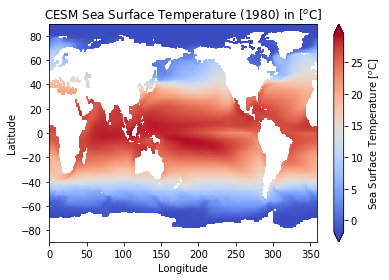

In [91]:
fig, ax = plt.subplots()
p = ax.pcolormesh(lon, lat, meandata, cmap="coolwarm",)
cb = plt.colorbar(p, extend="both")
cb.set_label('Sea Surface Temperature [$^{o}$C]')
ax.set_title('CESM Sea Surface Temperature (1980) in [$^{o}$C]')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

In [92]:
#Mask SST data outside the tropics
#Tropics: (23.4368,-23.4368)

data.shape

(12, 180, 360)

In [93]:
lat.shape

(180,)

TypeError: Dimensions of C (180, 360) are incompatible with X (180) and/or Y (360); see help(pcolormesh)

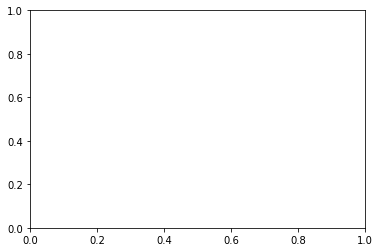

In [100]:
#Tropics= lat>-23.4368 & lat<23.4368
botTrop= lat>-23.4368
topTrop= lat<23.4368
tropics=TopTrop & BotTrop
fig, ax = plt.subplots()
p = ax.pcolormesh(botTrop,lon,meandata, cmap="coolwarm",)

In [ ]:
#Tropics= lat>-23.4368 & lat<23.4368
botTrop= lat>-23.4368
fig, ax = plt.subplots()
p = ax.pcolormesh(botTrop,lon,meandata, cmap="coolwarm",)